In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Hack para uso do matplotlib com o graph-tool
plt.plot()
plt.close()

# graph-tool


O módulo principal é o [`graph_tool`](https://graph-tool.skewed.de/static/doc/graph_tool.html). Nele constam a classe [`Graph`](https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Graph) e descritores importantes, o [`Vertex`](https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Vertex) e o [`Edge`](https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Edge). Os nomes são bastante sugestivos.

O módulo pode ser importado através do comando a seguir.

In [3]:
import graph_tool as gt

## Trabalhando com redes

### Criação de redes

Para a criação de redes/grafos a classe [`Graph`](https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Graph) possui inúmeros parâmetros possíveis. O parâmetro `directed` define se a rede será direcionada ou não. Existe ainda o método `set_directed` para que se defina ou não o sentido na interação entre os vértices. Por padrão as redes são sempre direcionadas.

In [4]:
g = gt.Graph()
g.is_directed()

True

In [5]:
g = gt.Graph(directed=False)
g.is_directed()

False

In [6]:
g.set_directed(True) 
g.is_directed()

True

### Adição de vértices e arestas

O método `add_vertex` de um objeto instanciado da classe [`Graph`](https://graph-tool.skewed.de/static/doc/graph_tool.html#graph_tool.Graph) adiciona vértices na rede, que posteriormente podem ser ligados com a utilização do método `add_edge`. Note que neste método, o primeiro parâmetro/vértice é a origem e o segundo é destino.

In [7]:
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)
g

<Graph object, directed, with 2 vertices and 1 edge, at 0x7f132e5890d0>

As classes/métodos vistos até aqui nos permite a criação de nossas primeiras redes de forma simples e rápida. Os descritores de arestas e vértices possuem métodos que permitem observar diversas características do elemento. Na sua maioria retornarão iteradores que podem ser arestas ou vértices. Lembre-se que o comando `dir` será sempre seu amigo. As _docstrings_ das funções também vacilitam bastante o trabalho.

> Uma informação importante é que em redes não direcionadas o graus de saída _(outdegree)_ são sinônimos de grau. Note que os graus de entrada _(in degree)_ serão sempre 0.

In [10]:
e.target(), e.source()

(<Vertex object with index '1' at 0x7f132e5f25f0>,
 <Vertex object with index '0' at 0x7f132e5f2660>)

In [11]:
list(v1.all_neighbors())

[<Vertex object with index '1' at 0x7f132e5f2890>]

In [13]:
list(v1.all_edges())

[<Edge object with source '0' and target '1' at 0x7f132d8ae940>]

In [16]:
dir(v1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__in_degree',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__out_degree',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__weighted_in_degree',
 '__weighted_out_degree',
 'all_edges',
 'all_neighbors',
 'all_neighbours',
 'graph_ptr',
 'graph_type',
 'in_degree',
 'in_edges',
 'in_neighbors',
 'in_neighbours',
 'is_valid',
 'out_degree',
 'out_edges',
 'out_neighbors',
 'out_neighbours']

O método `add_vertex` aceita ainda um parâmetro opcional _n_ que define o número de vértices que serão inseridos. O método retornará um iterador para que você possa referenciá-los de forma direta.

O método `vertex` também permite o acesso direto a um vértice da rede através do seu índice único e retorna um descritor de vértice.

In [17]:
saida = g.add_vertex(20)

In [19]:
saida

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f132d8193c0>

In [18]:
list(saida)

[<Vertex object with index '2' at 0x7f132d819430>,
 <Vertex object with index '3' at 0x7f132d8194a0>,
 <Vertex object with index '4' at 0x7f132d819510>,
 <Vertex object with index '5' at 0x7f132d819580>,
 <Vertex object with index '6' at 0x7f132d8195f0>,
 <Vertex object with index '7' at 0x7f132d819660>,
 <Vertex object with index '8' at 0x7f132d8196d0>,
 <Vertex object with index '9' at 0x7f132d819740>,
 <Vertex object with index '10' at 0x7f132d8197b0>,
 <Vertex object with index '11' at 0x7f132d819820>,
 <Vertex object with index '12' at 0x7f132d819890>,
 <Vertex object with index '13' at 0x7f132d819900>,
 <Vertex object with index '14' at 0x7f132d819970>,
 <Vertex object with index '15' at 0x7f132d8199e0>,
 <Vertex object with index '16' at 0x7f132d819a50>,
 <Vertex object with index '17' at 0x7f132d819ac0>,
 <Vertex object with index '18' at 0x7f132d819b30>,
 <Vertex object with index '19' at 0x7f132d819ba0>,
 <Vertex object with index '20' at 0x7f132d819c10>,
 <Vertex object with

In [20]:
g.vertex(8)

<Vertex object with index '8' at 0x7f132d819e40>

O método `add_edge` pode ser utilizado com a saída do método `vertex` para a criação de arestas entre dois vértices.

_Nota: utilizar o índice único também funciona._

A dinâmica muda um pouco para se referenciar arestas. Para acessar uma aresta entre dois vértices (id 8 e 10, por exemplo) utiliza-se do método `edge`.

In [21]:
a = g.add_edge(g.vertex(8), g.vertex(10))
e = g.edge(8,10)
e

<Edge object with source '8' and target '10' at 0x7f132d7c1430>

Os métodos `remove_edge` e `remove_vertex` completam a suíte básica de manipulação de elementos de uma rede.

In [23]:
g.remove_edge(e)
g.remove_vertex(v2)

### Iterar vértices e arestas da rede

Existem alguma formas de iterar pelos vértices e arestas da rede. Os métodos `vertices` e `edges` são os mais simples para auxiliar nesta tarefa.

In [25]:
np.random.choice(g.num_vertices(), 2)

array([9, 1])

In [26]:
for x in range(10):
    v1, v2 = np.random.choice(g.num_vertices(), 2)
    g.add_edge(v1, v2)

In [27]:
list(g.edges())

[<Edge object with source '5' and target '0' at 0x7f132d8ae9d0>,
 <Edge object with source '7' and target '9' at 0x7f132d8ae820>,
 <Edge object with source '7' and target '7' at 0x7f132d8aea60>,
 <Edge object with source '9' and target '14' at 0x7f132d7db040>,
 <Edge object with source '10' and target '4' at 0x7f132d7db0d0>,
 <Edge object with source '11' and target '6' at 0x7f132d7db160>,
 <Edge object with source '12' and target '12' at 0x7f132d7db1f0>,
 <Edge object with source '12' and target '14' at 0x7f132d7db280>,
 <Edge object with source '14' and target '11' at 0x7f132d7db310>,
 <Edge object with source '15' and target '20' at 0x7f132d7db3a0>,
 <Edge object with source '19' and target '14' at 0x7f132d7db430>]

É importante lembrar que a maioria dos métodos existentes para os descritores de `Vertex` e `Edge` são também iteradores.

In [30]:
for v in g.vertices():
    print(f'Vértice {v}')
    for e in v.out_edges():
       print(f'Aresta {e}')
    for w in v.out_neighbors():
       print(f'Vizinho {w}')

Vértice 0
Vértice 1
Vértice 2
Vértice 3
Vértice 4
Vértice 5
Aresta (5, 0)
Vizinho 0
Vértice 6
Vértice 7
Aresta (7, 9)
Aresta (7, 7)
Vizinho 9
Vizinho 7
Vértice 8
Vértice 9
Aresta (9, 14)
Vizinho 14
Vértice 10
Aresta (10, 4)
Vizinho 4
Vértice 11
Aresta (11, 6)
Vizinho 6
Vértice 12
Aresta (12, 12)
Aresta (12, 14)
Vizinho 12
Vizinho 14
Vértice 13
Vértice 14
Aresta (14, 11)
Vizinho 11
Vértice 15
Aresta (15, 20)
Vizinho 20
Vértice 16
Vértice 17
Vértice 18
Vértice 19
Aresta (19, 14)
Vizinho 14
Vértice 20


Outras implementações utilizam do mesmo racicíonio de implementação do **Numpy** métodos como o `get_vertices`, `get_edges` retornam um `numpy.ndarray` para que se evite o custo de se utilizar a estruturas de repetição do **Python**.

Outros métodos como o `get_{out,in,all}_edges`, `get_{out,in,total}_degrees` e `get_{out,in,all}_neighbors` podem ser utilizados passando como parâmetro um descritor `Vertex` ou o índice único de forma análoga para obter informações dos vértices.

Apenas os métodos que retornam um grau (sufixo _degrees_) aceitam uma lista de vértices como parâmetro. Os demais trabalham com um vértice por vez.

In [33]:
g.get_vertices(), g.get_edges()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([[ 5,  0],
        [ 7,  9],
        [ 7,  7],
        [ 9, 14],
        [10,  4],
        [11,  6],
        [12, 12],
        [12, 14],
        [14, 11],
        [15, 20],
        [19, 14]]))

In [37]:
g.get_in_degrees([9]), g.get_all_neighbors(20), g.get_in_edges(9)

(array([1], dtype=uint64), array([15]), array([[7, 9]]))

In [40]:
g.get_total_degrees([9, 10, 0, 8])

array([2, 1, 1, 0], dtype=uint64)

Os métodos `num_vertices` e `num_edges` retornam rapidamente a contagem destes descritores.

In [41]:
g.num_vertices(), g.num_edges()

(21, 11)

### Visualização básica

Show! Mas como ficou essa rede? Para isso existe o submódulo `draw`.

In [43]:
import graph_tool.draw as gtd

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1501: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


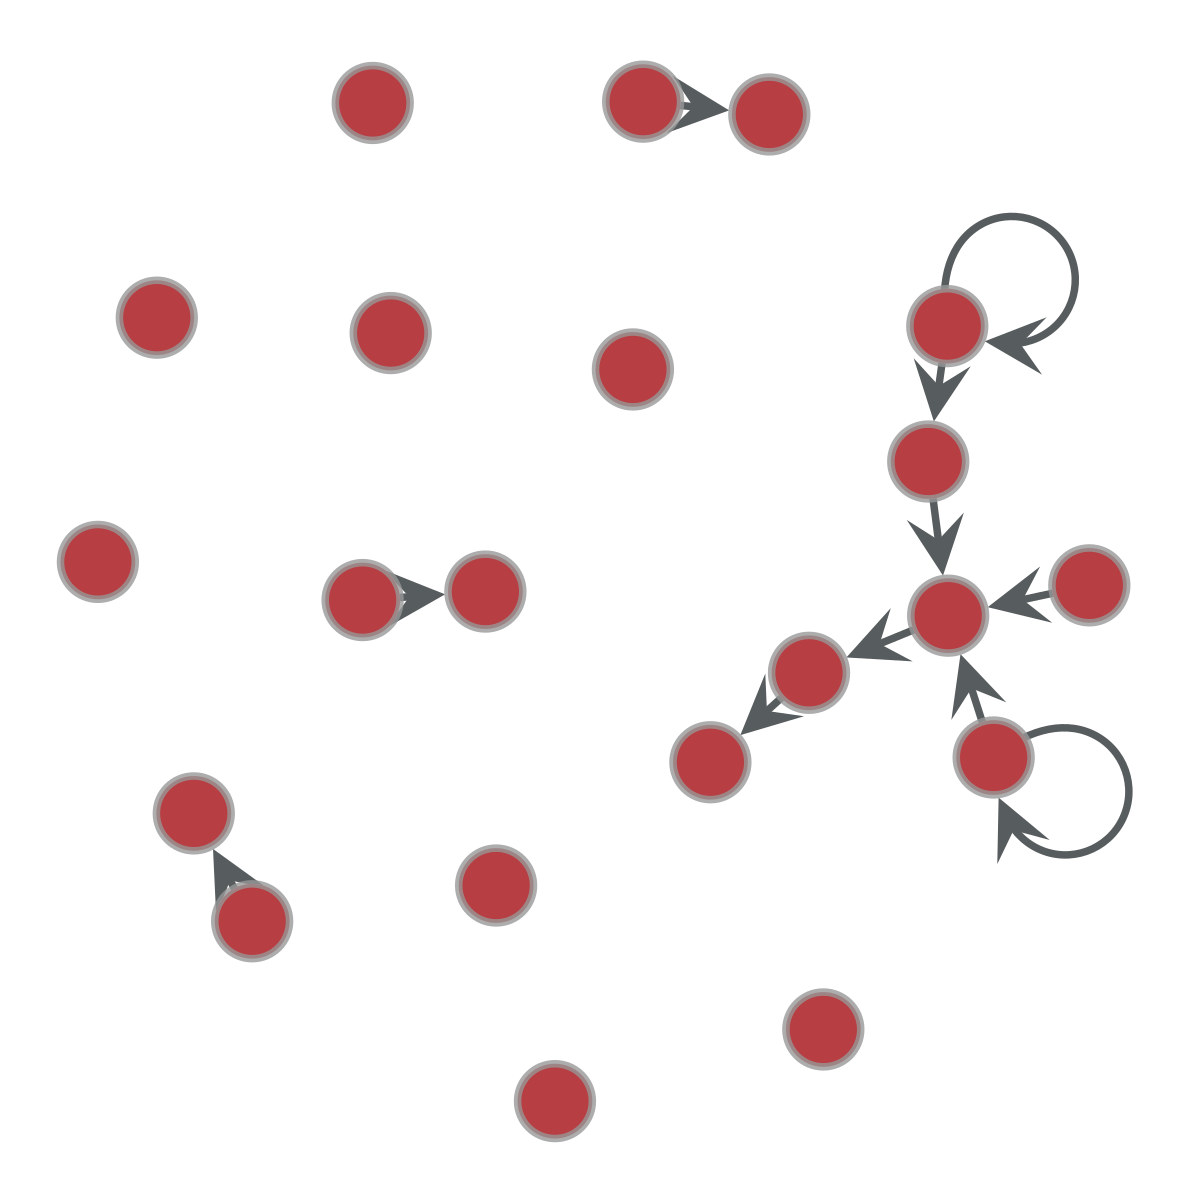

In [44]:
gtd.graph_draw(g);

A função de desenho da rede possui inúmeras possibilidades e parâmetros. O atributo _ink\_scale_ é especialmente útil por reduzir proporcionalmente todos os elementos da rede.

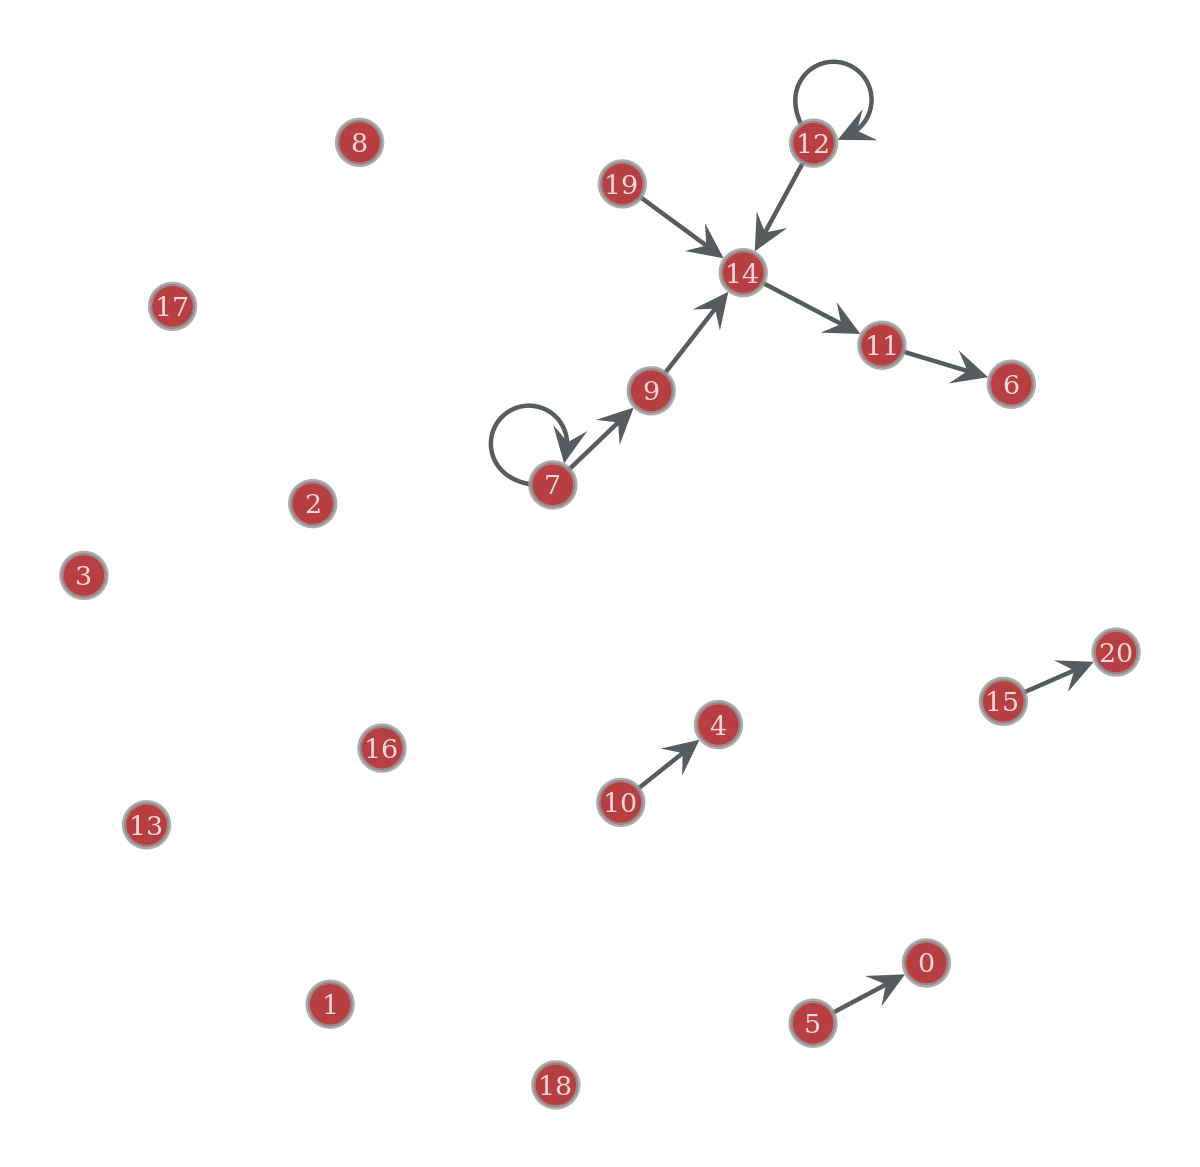

In [45]:
gtd.graph_draw(g, vertex_text=g.vertex_index,
               adjust_aspect=True, ink_scale=0.6);

### Salvar e carregar redes

Operações de entrada e saída utilizam os métodos `save` e `load` que são bastante simples e intuitivas. Ambos métodos possuem o parâmetro _fmt_ que define o formato do arquivo. São suportados:

- graphml ou xml
- gt
- dot
- gml

Apenas os formatos _graphml_ e _gt_ preservam as propriedades das redes e de outros elementos, função interessante do **graph-tool** que será vista mais a frente.

In [52]:
g.save('teste.xml', fmt='graphml')

In [54]:
g

<Graph object, directed, with 21 vertices and 11 edges, at 0x7f132e5890d0>

In [53]:
novo = gt.Graph()
novo.load('teste.xml')
novo

<Graph object, directed, with 21 vertices and 11 edges, at 0x7f131d618610>

E os arquivos csv? Para isso, existe uma função separada, a `load_graph_from_csv`. Esta função possui o parâmetro _csv\_options_ que permite a utilização de recursos para trabalhar com diferentes tipos de arquivo texto.

In [55]:
og = gt.load_graph_from_csv('moreno_innovation',
                           csv_options={"delimiter": " "},
                           directed=False)

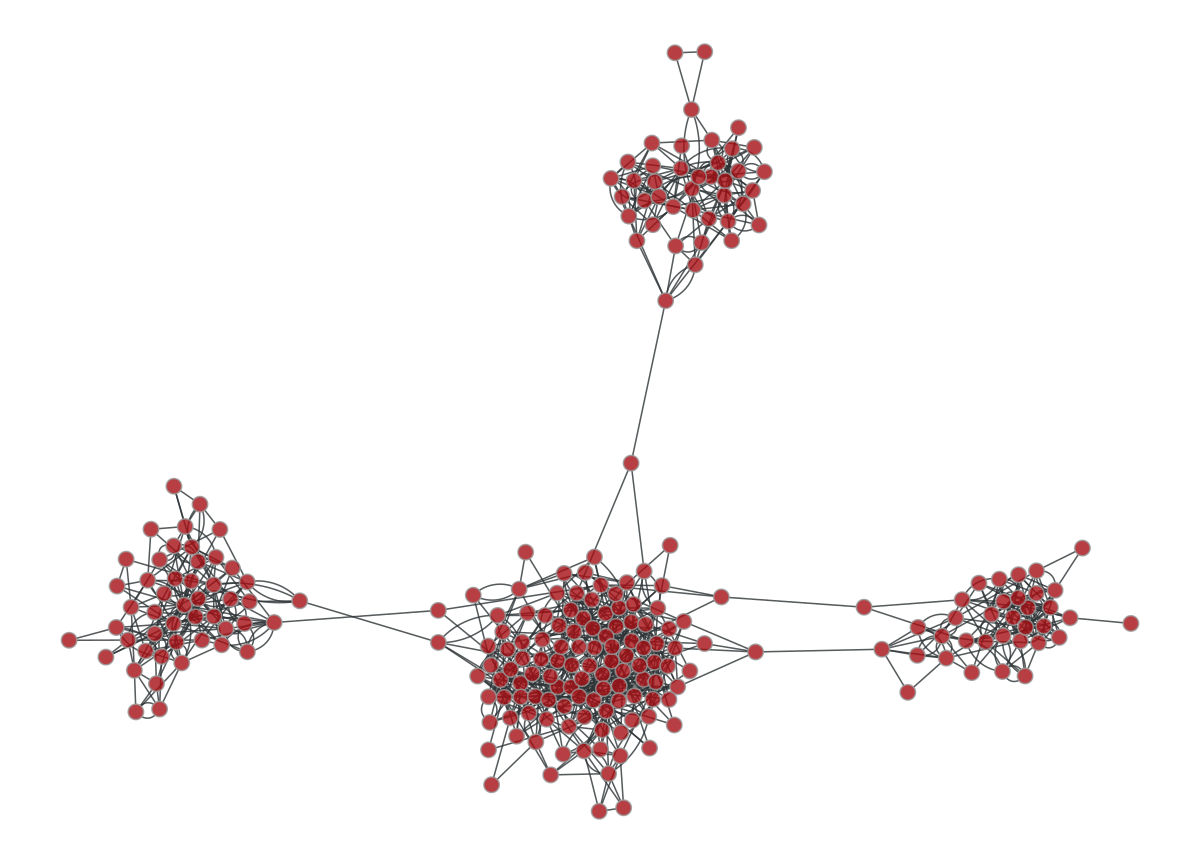

In [56]:
gtd.graph_draw(og, ink_scale=0.7);

## Funcionalidades do graph-tool
### Propriedades na rede

Mecanismo que o **graph-tool** utiliza para guardar outras informações. Estas propriedades podem ser aplicadas à rede, aos vértices e às arestas. As classes `VertexPropertyMap`, `EdgePropertyMap` e `GraphPropertyMap` derivam da classe `PropertyMap`. Suporta diversos tipos de dados/variáveis diferentes como _int_ , _float_ , _short_ , _string_ e _vector_ destes tipos. É possível ainda utilizar _python::object_.

Esta classe se associa a outra classe `PropertyArray`. Este elemento pode ser associado através do método `get_array()` e nada mais do que um `numpy.ndarray`.

Mas como criá-los?

|     Tipo     |     Método           |     Alias     |
|--------------|----------------------|---------------|
| Vértice      | new\_vertex_property | new\_vp       |
| Aresta       | new\_edge_property   | new\_ep       |
| Rede         | new\_graph_property  | new\_gp       |

In [57]:
prop_v = g.new_vp('double')
prop_v

<VertexPropertyMap object with value type 'double', for Graph 0x7f132e5890d0, at 0x7f131d618e50>

In [58]:
prop_v.get_array(), prop_v.a

(PropertyArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                0., 0., 0., 0., 0., 0.]),
 PropertyArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                0., 0., 0., 0., 0., 0.]))

In [60]:
prop_v.a = np.random.random(g.num_vertices())
prop_v.a

PropertyArray([0.78862455, 0.6166435 , 0.21354712, 0.76215989, 0.58639907,
               0.80141109, 0.8459077 , 0.71670618, 0.53479211, 0.1495572 ,
               0.2611921 , 0.10215489, 0.68531362, 0.26567781, 0.57900327,
               0.31745623, 0.61695397, 0.645067  , 0.81233001, 0.43307591,
               0.11882769])

Note que até este momento, as propriedades foram criadas, mas que ainda não foram associadas as redes. Para criá-las pode-se utilizar o dicionário `properties` com as chaves "e", "g" e "v" ou com os métodos `vertex_properties`, `graph_properties` e `edge_properties`.

In [68]:
g.vertex_properties['v'] = g.new_vertex_property('double')
g.edge_properties['e'] = g.new_edge_property('string')
g.graph_properties['Nome'] = g.new_graph_property('string', 'Rede de teste')

In [70]:
g.properties[('v', 'dv' )] = g.new_vp('double')
g.properties[('e', 'de' )] = g.new_vp('string')
g.properties[('g', 'dNome' )] = g.new_gp('string')

In [71]:
g.properties

{('v',
  'v'): <VertexPropertyMap object with value type 'double', for Graph 0x7f132e5890d0, at 0x7f131d5ed760>,
 ('e',
  'e'): <EdgePropertyMap object with value type 'string', for Graph 0x7f132e5890d0, at 0x7f131d5eddc0>,
 ('g',
  'Nome'): <GraphPropertyMap object with value type 'string', for Graph 0x7f132e5890d0, at 0x7f131d5ed130>,
 ('v',
  'dv'): <VertexPropertyMap object with value type 'double', for Graph 0x7f132e5890d0, at 0x7f131d5ed460>,
 ('e',
  'de'): <VertexPropertyMap object with value type 'string', for Graph 0x7f132e5890d0, at 0x7f131d5ed7c0>,
 ('g',
  'dNome'): <GraphPropertyMap object with value type 'string', for Graph 0x7f132e5890d0, at 0x7f131d5ed850>}

In [72]:
g.list_properties()

Nome           (graph)   (type: string, val: Rede de teste)
dNome          (graph)   (type: string, val: )
dv             (vertex)  (type: double)
v              (vertex)  (type: double)
de             (edge)    (type: string)
e              (edge)    (type: string)


In [73]:
g.properties[('v', 'dv')].a = np.random.random(g.num_vertices())
g.vertex_properties['dv'].a

PropertyArray([0.23739645, 0.49065769, 0.41824223, 0.48062963, 0.20188145,
               0.54330422, 0.375952  , 0.72317364, 0.37832376, 0.37808815,
               0.67659195, 0.37225594, 0.42057896, 0.24841628, 0.45298373,
               0.89686004, 0.43363253, 0.48347676, 0.11786249, 0.56617894,
               0.98868454])

### Filtragem nas redes

A ideia é temporariamente modificar as redes sem a verdadeira remoção de arestas ou vértices. Especialmente útil para análise da topologia da rede/grafo ou outras verificações.

Mas como? Utilizando um `PropertyMap` de valores booleanos. Com valor 1 os componentes são vistos, com valor 0 não.
Assim, os métodos `set_vertex_filter` e `set_edge_filter()` realizam os ajuste da filtragem.

In [74]:
pos = gtd.sfdp_layout(g)
filtered = g.new_vp('boolean')
filtered.a[0:7] = 1
filtered.a[9:12] = 1

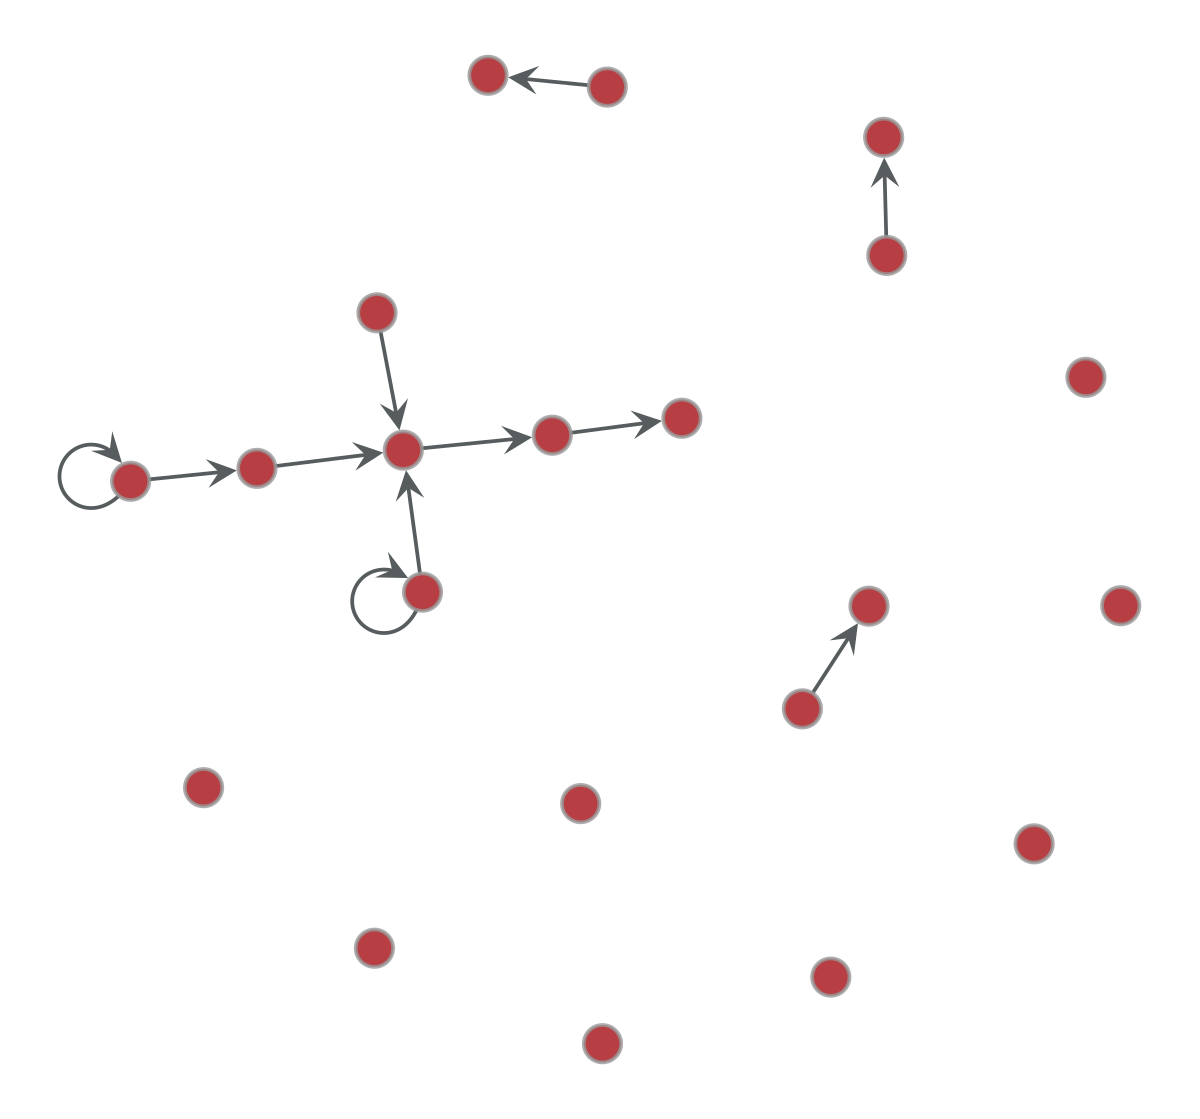

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f132e5890d0, at 0x7f131d5ed970>

In [79]:
gtd.graph_draw(g, pos=pos, ink_scale=0.5)

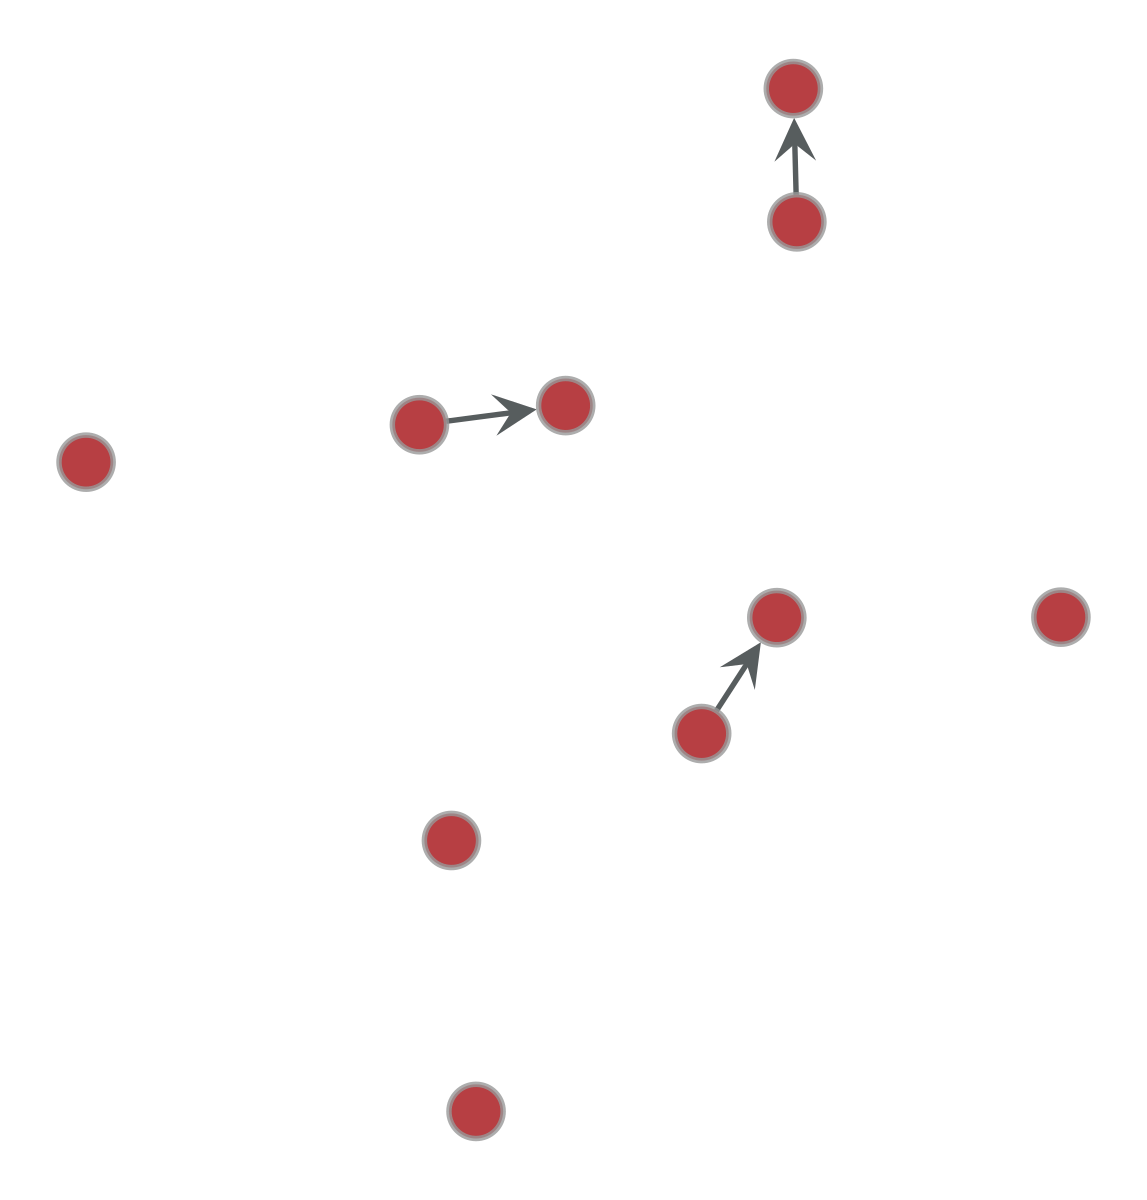

In [82]:
g.set_vertex_filter(filtered)
gtd.graph_draw(g, pos=pos, ink_scale=0.5);

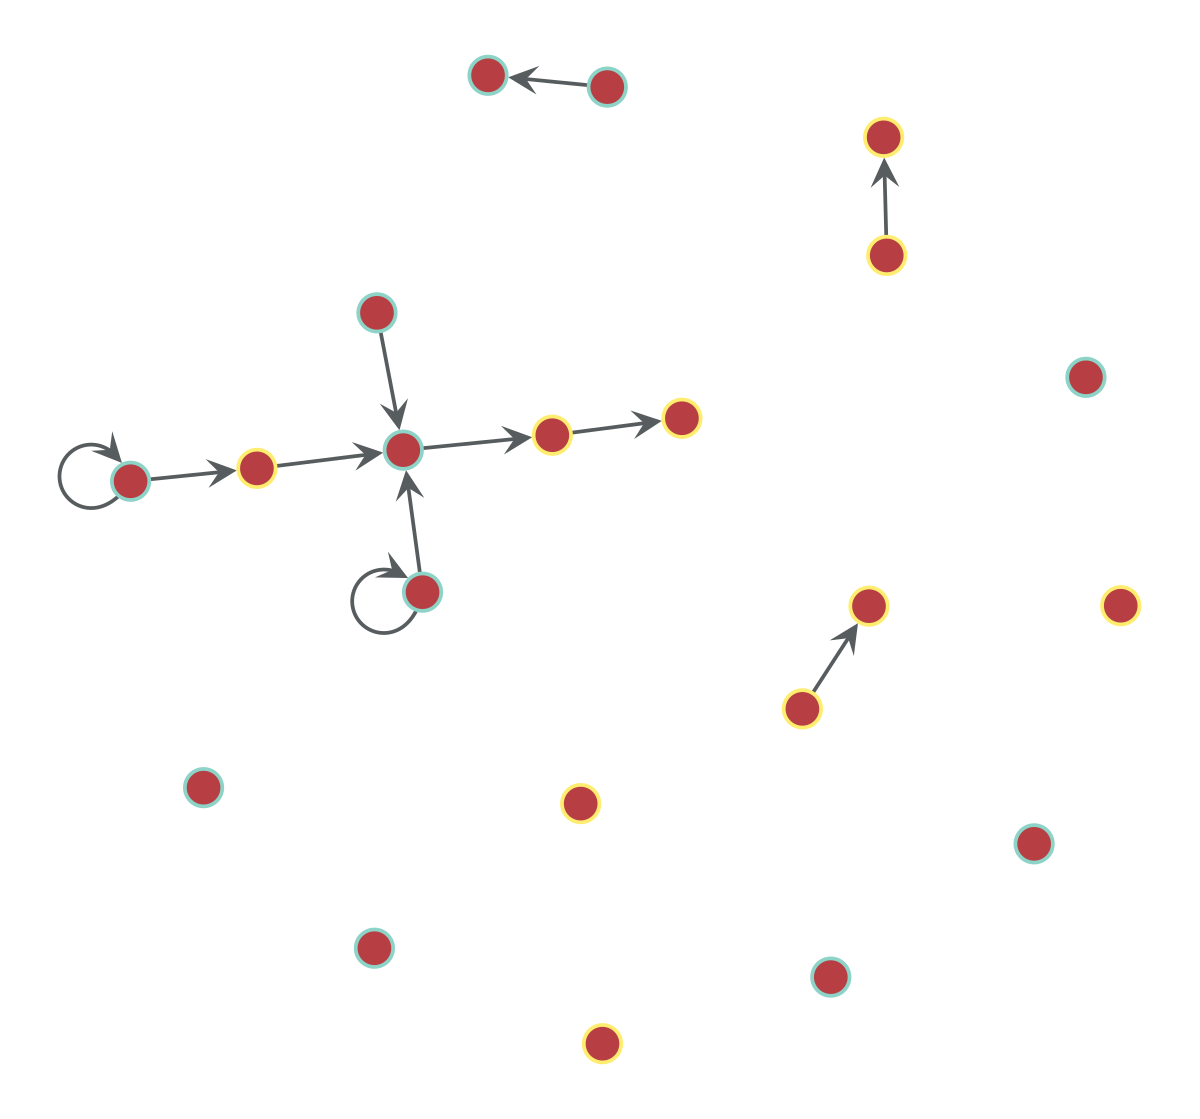

In [83]:
g.set_vertex_filter(None)
gtd.graph_draw(g, pos=pos, vertex_color=filtered, ink_scale=0.5);

Especialmente útil certo? Imagine você realizar tarefa parecida, com complexidade $\mathcal{O}(1)$ e que se comportaria como uma nova rede? Para isto existe a classe `GraphView`. Através dos parâmetros _vfilt_ e _efilt_ é possível se criar uma nova visão para se trabalhar de forma mais ágil.

In [84]:
ng = gt.GraphView(g, vfilt=filtered)
g, ng

(<Graph object, directed, with 21 vertices and 11 edges, 2 internal vertex properties, 2 internal edge properties, 2 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f132e5890d0, at 0x7f131d6187f0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f132e5890d0, at 0x7f131d5ed9a0>, False), at 0x7f132e5890d0>,
 <GraphView object, directed, with 10 vertices and 3 edges, 2 internal vertex properties, 2 internal edge properties, 2 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f131d5ed6d0, at 0x7f131c5ba5b0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f131d5ed6d0, at 0x7f131c5bad00>, False), at 0x7f131d5ed6d0>)

Pode-se trabalhar com este objeto, como uma nova rede, realizando a maioria das operações que são aplicadas a uma rede carregada/criada.

In [85]:
ng.add_edge(ng.vertex(1), ng.vertex(11));

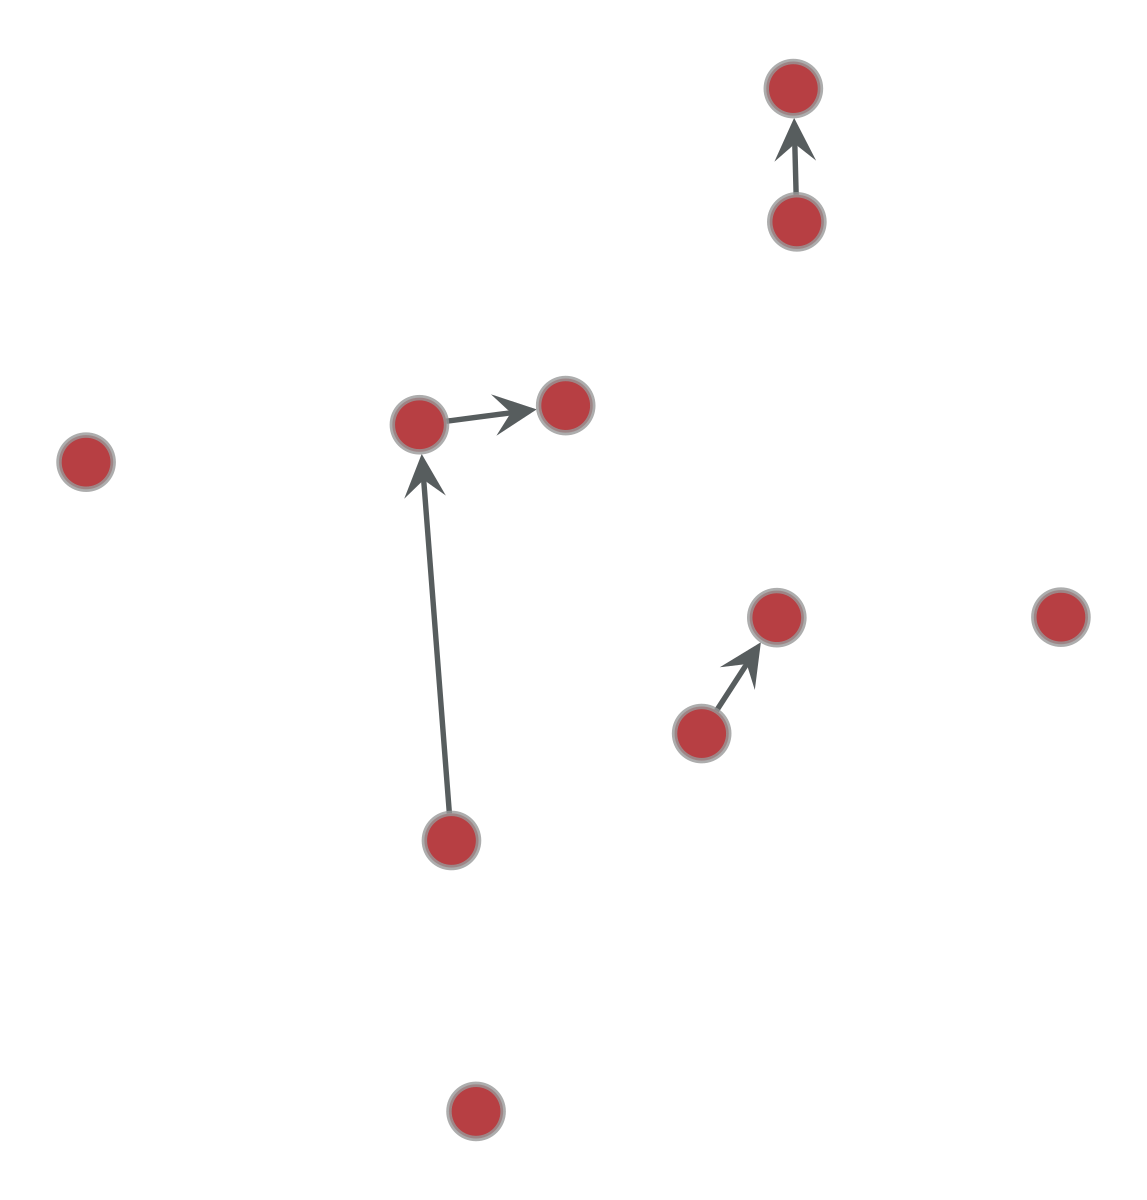

In [86]:
gtd.graph_draw(ng, pos=pos, ink_scale=0.5);

### Como melhorar a visualização?

É importante e frequente a necessidade de se aumentar o grau de controle das plotagens da rede. Normalmente este processo é feito com o auxílio do `matplotlib`. Assim o parâmetro _mplfig_ direciona para um objeto que contenha o atributo `artists`. Exemplos: [matplotlib.figure.Figure](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) ou [matplotlib.axes.Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes).

É necessário alterar o _backend_ de plotagem do **matplotlib** para _cairo_. O comando para esta alteração é:
```python
plt.switch_backend('cairo')
```

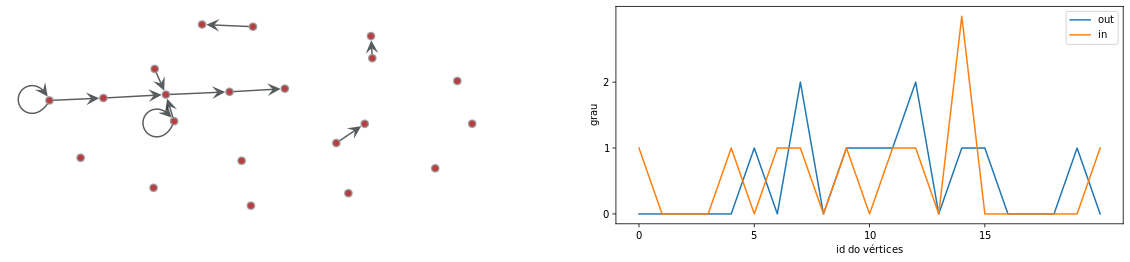

In [91]:
plt.switch_backend('cairo')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
gtd.graph_draw(g, pos=pos, mplfig=ax1, ink_scale=0.03);

ax2.plot(g.get_out_degrees(g.get_vertices()), label='out')
ax2.plot(g.get_in_degrees(g.get_vertices()), label='in')
ax2.set_ylabel('grau')
ax2.set_xlabel('id do vértices')
ax2.set_yticks([0, 1, 2])
ax2.set_xticks(np.arange(0, 20, 5))

ax2.legend()

ax1.axis('off');

Já se observou até aqui alguns mecanismos para se fixar a posição do vértices, ajustando o layout/organização dos componentes na imagem. O **graph-tool** possui diversas outras funcionalidades e uma atenção especial pode ser dada à organização dos elementos. Existe um conjunto de métodos focados neste posicionamento, a se destacar:

- sfdp_layout
- fruchterman_reingold_layout
- arf_layout
- radial_tree_layout
- random_layout

A saída destes métodos é aplicada através do parâmetros _pos_ da função `graph_draw`.

In [94]:
calls = dict(sfdp = gtd.sfdp_layout(g),
             arf = gtd.arf_layout(g, max_iter=1000),
             fruchterman = gtd.fruchterman_reingold_layout(g, n_iter=100),
             random = gtd.random_layout(g),
             #radial_tree = gtd.radial_tree_layout(g, g.vertex(5)),
             #planar = gtd.planar_layout(g),
             )

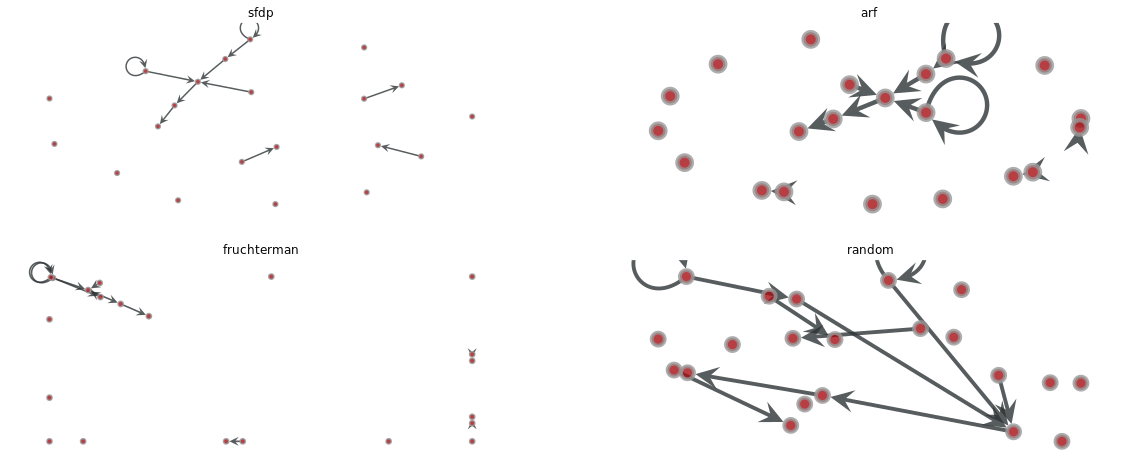

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(20,8))

for axe, method in zip(ax.flat, calls.keys()):
    gtd.graph_draw(g,
                   pos=calls[method],
                   mplfig=axe,                   
                   ink_scale=0.02);
    axe.set_title(method)
    axe.axis('off')

### Coleção de redes clássicas

O **graph-tool** possui o submódulo [`collection`](https://graph-tool.skewed.de/static/doc/collection.html) que possui uma série de redes clássicas, com diversas informações, que podem facilitar o estudo e a realização de testes.

In [99]:
import graph_tool.collection as gtcl

In [102]:
ng = gtcl.data['polblogs']

In [103]:
ng

<Graph object, directed, with 1490 vertices and 19090 edges, 4 internal vertex properties, 2 internal graph properties, at 0x7f1317703400>

In [104]:
ng.list_properties()

readme          (graph)   (type: string, val: Political blogosphere Feb. 2005
                                              Data compiled by Lada Adamic and
                                              Natalie Glance  Node "value"
                                              attributes indicate political
                                              leaning according to:    0 (left
                                              or liberal)   1 (right or
                                              conservative)  Data on political
                                              leaning comes from blog
                                              directories as indicated.  Some
                                              blogs were labeled manually,
                                              based on incoming and outgoing
                                              links and posts around the time
                                              of the 2004 presidential
             

## Medidas básicas de redes complexas

### Medidas de centralidade
Existe no **graph-tool** um submódulo (`centrality`) cujo foco é apenas medidas de centralidade. O uso dos métodos é bastante simples sendo que a maioria dos métodos retorna um `PropertyArray` com a centralidade de cada um dos vértices.

- [`pagerank`](https://graph-tool.skewed.de/static/doc/centrality.html#graph_tool.centrality.pagerank)
- [`closeness`](https://graph-tool.skewed.de/static/doc/centrality.html#graph_tool.centrality.closeness)
- [`eigenvector`](https://graph-tool.skewed.de/static/doc/centrality.html#graph_tool.centrality.eigenvector)
- [`katz`](https://graph-tool.skewed.de/static/doc/centrality.html#graph_tool.centrality.katz)
- [`betweenness`](https://graph-tool.skewed.de/static/doc/centrality.html#graph_tool.centrality.betweenness)

In [105]:
import graph_tool.centrality as gtc

In [106]:
gtc.pagerank(ng).a

PropertyArray([0.00034178, 0.00034123, 0.00018725, ..., 0.00018725,
               0.00082483, 0.00018725])

In [112]:
gtc.closeness(ng).get_array()

PropertyArray([0.31071429, 0.32852729,        nan, ..., 0.24010025,
               0.31563325, 0.14910506])

In [108]:
gtc.eigenvector(ng)

(34.47302288773821,
 <VertexPropertyMap object with value type 'double', for Graph 0x7f1317703400, at 0x7f13174dab80>)

In [109]:
gtc.katz(ng)

<VertexPropertyMap object with value type 'double', for Graph 0x7f1317703400, at 0x7f131c23e520>

In [110]:
gtc.betweenness(ng)

(<VertexPropertyMap object with value type 'double', for Graph 0x7f1317703400, at 0x7f13174da820>,
 <EdgePropertyMap object with value type 'double', for Graph 0x7f1317703400, at 0x7f13174da520>)

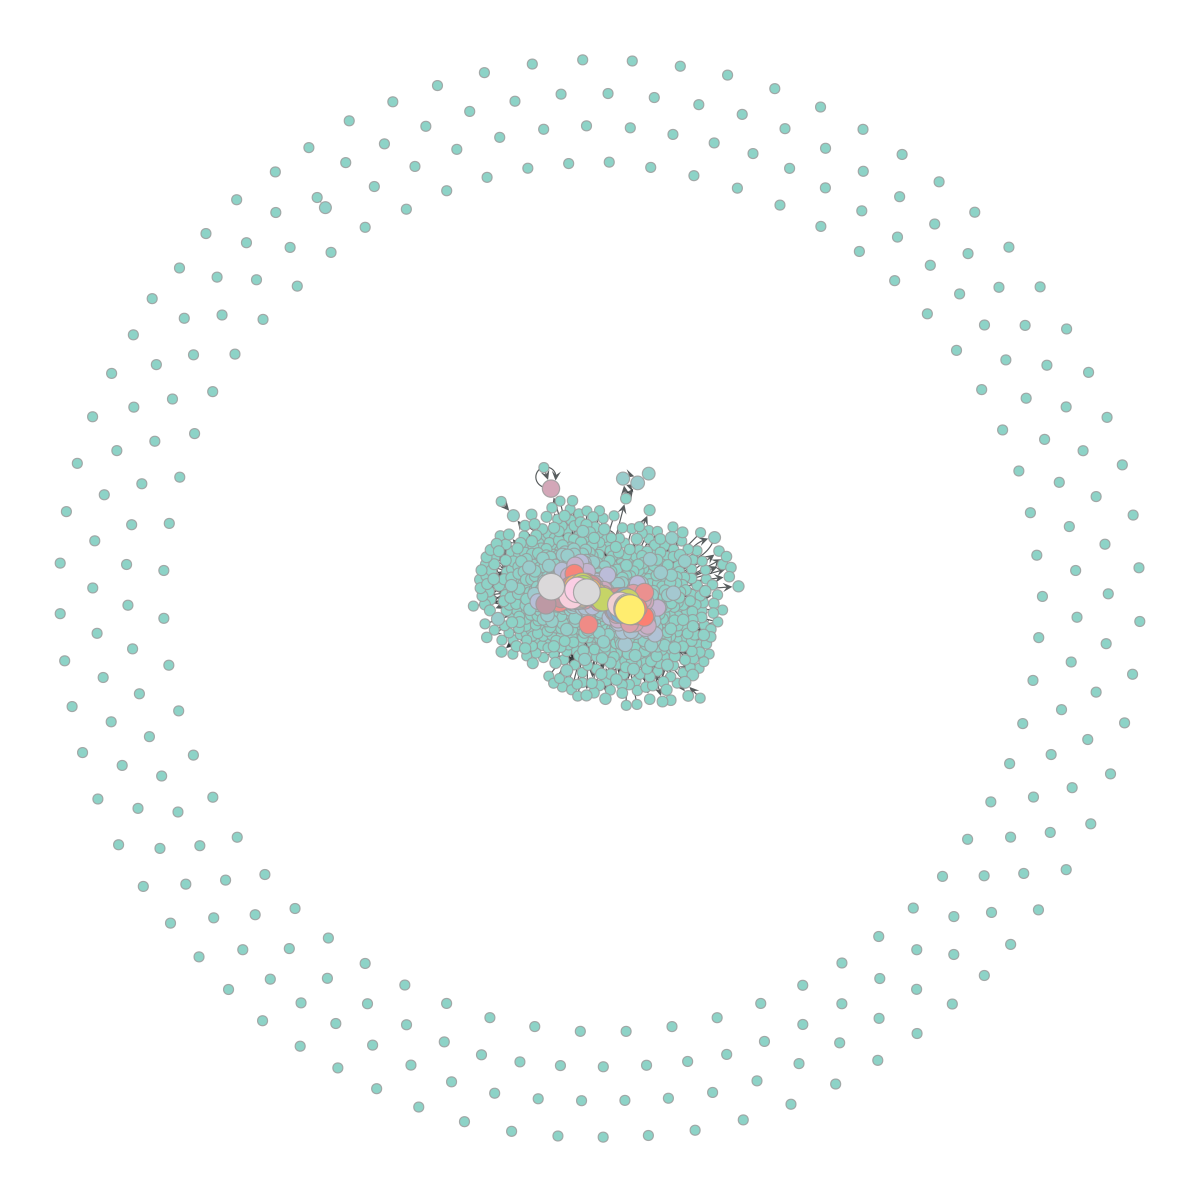

In [113]:
pr = gtc.pagerank(ng)
gtd.graph_draw(ng, pos=ng.vp["pos"], vertex_fill_color=pr,
              vertex_size=gtd.prop_to_size(pr, mi=5, ma=15),
              vorder=pr);

### Medidas de clustering e assortatividade

Existe o submódulo [`clustering`](https://graph-tool.skewed.de/static/doc/clustering.html) com uma série de métodos que calculam diferentes tipos de _clustering_. Focou-se apenas na medida local (para todos os vértices) e na medida global (de toda rede).

- [`local_clustering`](https://graph-tool.skewed.de/static/doc/clustering.html#graph_tool.clustering.local_clustering)
- [`global_clustering`](https://graph-tool.skewed.de/static/doc/clustering.html#graph_tool.clustering.global_clustering)

Para verificação de coeficiente de correlação de grau (assortatividade) existe o submódulo [`correlations`](https://graph-tool.skewed.de/static/doc/correlations.html). O método `assortativity` retorna a assortatividade e sua variância (uma tupla) segundo o tipo de grau escolhido (_in_ , _out_ , _total_ ).

In [114]:
import graph_tool.clustering as gtcl
import graph_tool.correlations as gtco

In [115]:
gtcl.local_clustering(ng).a

PropertyArray([0.45868946, 0.45212766, 0.        , ..., 0.        ,
               0.35497835, 0.        ])

In [116]:
gtcl.global_clustering(ng)

(0.2511340188281317, 0.01774040126592401)

In [117]:
gtco.assortativity(ng, 'out')

(-0.0009611326534418016, 0.0007372937274479034)

## Curiosidades

Setar a imagem da figura utilizando o **matplotlib**.

(-2.1507713309439733, 7.632625939958714, 6.589062218943801, -4.193540874862965)

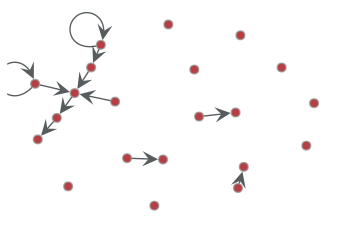

In [134]:
fig = plt.Figure(figsize=(8,4))

gtd.graph_draw(g, mplfig=plt.gcf(), ink_scale=0.05);
plt.axis('off')